# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [1]:
# Download the data
! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

--2019-06-10 17:13:35--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0.01s   

2019-06-10 17:13:36 (1.84 MB/s) - ‘pima-indians-diabetes.csv’ saved [23628/23628]



In [2]:
# check if the data is downloaded
%ls -l

total 28
-rw-r--r-- 1 root root 23628 Jun 10 17:13 pima-indians-diabetes.csv
drwxr-xr-x 1 root root  4096 May 31 16:17 sample_data/


In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [0]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,:-1]
y = dataset[:,-1]

In [8]:
# print the shape of x
#
X.shape

(768, 8)

In [9]:
# save to number of input dimensions in input_dim
input_dim = X.shape
input_dim

(768, 8)

In [10]:
# shape of y
y.shape

(768,)

In [0]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [12]:
# shape of X_test
X_test.shape


(116, 8)

# Model

In [0]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
_ =  Sequential()
_.add(Dense(12, input_dim=8, activation='relu'))
_.add(Dense(8, activation='relu'))
_.add(Dense(1, activation='sigmoid'))


In [0]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
_.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [37]:
# Fit the model
#
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = _.fit(X_train, y_train, batch_size=10, epochs=300, validation_split=0.15)

Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 1s 1ms/step - loss: 2.5618 - acc: 0.4819 - val_loss: 1.6625 - val_acc: 0.5714
Epoch 2/300
554/554 [==============================] - 0s 129us/step - loss: 1.5892 - acc: 0.5776 - val_loss: 1.2423 - val_acc: 0.5714
Epoch 3/300
554/554 [==============================] - 0s 137us/step - loss: 1.3267 - acc: 0.6029 - val_loss: 1.1913 - val_acc: 0.6327
Epoch 4/300
554/554 [==============================] - 0s 124us/step - loss: 1.1068 - acc: 0.6137 - val_loss: 0.9266 - val_acc: 0.6122
Epoch 5/300
554/554 [==============================] - 0s 128us/step - loss: 0.9099 - acc: 0.6336 - val_loss: 0.9005 - val_acc: 0.6633
Epoch 6/300
554/554 [==============================] - 0s 132us/step - loss: 0.8636 - acc: 0.6588 - val_loss: 0.7658 - val_acc: 0.5816
Epoch 7/300
554/554 [==============================] - 0s 129us/step - loss: 0.8021 - acc: 0.6336 - val_loss: 0.7649 - val_acc: 0.6633
Epoch 8/300


In [38]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


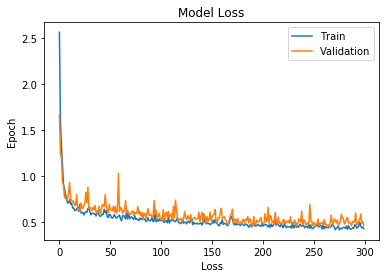

In [39]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
graph = plt.plot(range(300), history.history['loss'])
graph = plt.plot(range(300), history.history['val_loss'])
graph = plt.xlabel('Loss')
graph = plt.ylabel('Epoch')
graph = plt.title('Model Loss')
graph = plt.legend(['Train', 'Validation'])
plt.show()

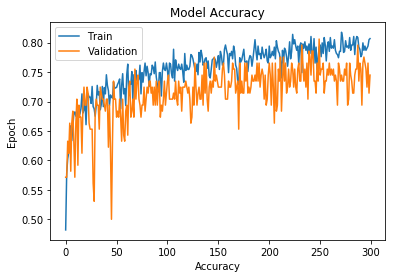

In [40]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_acc'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
graph = plt.plot(range(300), history.history['acc'])
graph = plt.plot(range(300), history.history['val_acc'])
graph = plt.xlabel('Accuracy')
graph = plt.ylabel('Epoch')
graph = plt.title('Model Accuracy')
graph = plt.legend(['Train', 'Validation'])
plt.show()

In [41]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = _.evaluate(X_test, y_test)

116/116 [==============================] - 0s 48us/step


In [42]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.5595929694586786
Test accuracy: 0.7931034503311947
